# ADA

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import math
import random 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_precision_recall_curve, balanced_accuracy_score, roc_auc_score
from sklearn import metrics, model_selection
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [63]:
#import training dataset
train_df = pd.read_csv("ada_train.data" , header=None, delimiter=r"\s+")
#import training label
train_labels = pd.read_csv("ada_train.labels" , header=None)

#import validation dataset
valid_df = pd.read_csv("ada_valid.data" , header=None, delimiter=r"\s+")
#import validation label
valid_labels = pd.read_csv("ada_valid.labels" , header=None)

#import testing dataset
test_df = pd.read_csv("ada_test.data" , header=None,delimiter=r"\s+")

In [64]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,1,1,32,0,0,0,1,0,0,...,0,404,1,0,0,0,0,0,0,0
1,0,0,1,133,0,0,1,0,0,0,...,0,242,0,0,0,0,0,0,0,0
2,0,0,0,109,0,0,0,1,0,0,...,0,404,1,0,0,0,0,0,0,0
3,0,0,0,113,0,0,0,1,0,0,...,0,404,0,0,0,1,0,1,0,0
4,0,0,0,120,0,0,0,1,0,0,...,0,303,0,1,0,0,0,0,0,0


In [65]:
train_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
4142,0,0,0,50,1,0,0,1,1,0,...,0,404,0,0,0,0,0,0,0,1
4143,0,0,0,144,0,0,0,1,1,0,...,0,404,1,0,0,0,0,0,0,0
4144,0,0,0,129,0,0,0,0,0,0,...,0,353,1,1,0,0,0,0,0,0
4145,0,0,0,225,0,0,1,1,0,0,...,0,303,0,0,0,0,0,0,0,0
4146,0,0,0,46,0,0,0,1,0,0,...,0,404,0,0,0,1,0,1,0,0


In [66]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,...,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000
mean,0.008922,0.028937,0.120569,126.408006,0.104895,0.028454,0.140825,0.860140,0.134314,20.033036,...,0.004823,411.804196,0.266458,0.106824,0.000482,0.463950,0.073065,0.140825,0.000241,0.029901
std,0.094046,0.167649,0.325665,69.754074,0.306455,0.166287,0.347883,0.346884,0.341030,91.933304,...,0.069287,119.999993,0.442160,0.308927,0.021958,0.498759,0.260274,0.347883,0.015529,0.170335
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,78.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,119.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,160.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,454.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,648.000000,...,1.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
train_df.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
41    int64
42    int64
43    int64
44    int64
45    int64
46    int64
47    int64
dtype: object

In [68]:
train_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
dtype: int64

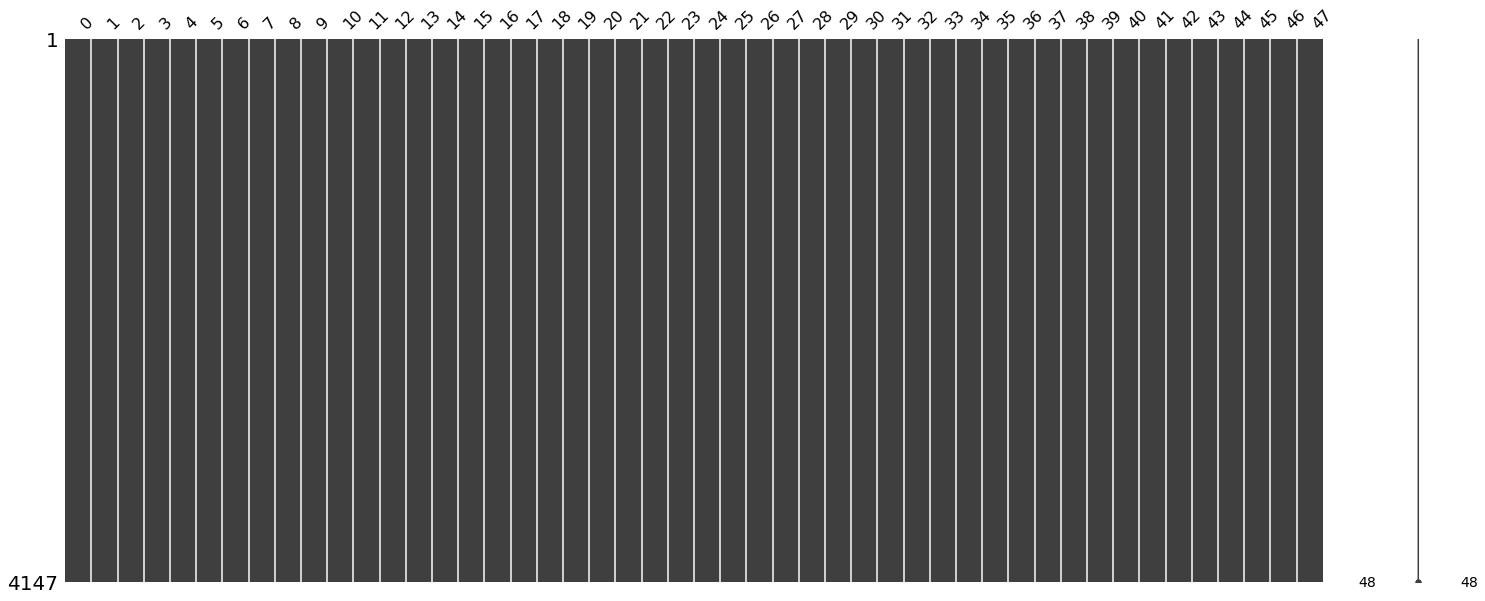

In [69]:
msno.matrix(train_df)

## Applying Several ML Algorithms

In [70]:
combine_df = train_df.append(valid_df,ignore_index = True)
combine_df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,1,1,32,0,0,0,1,0,0,...,0,404,1,0,0,0,0,0,0,0
1,0,0,1,133,0,0,1,0,0,0,...,0,242,0,0,0,0,0,0,0,0
2,0,0,0,109,0,0,0,1,0,0,...,0,404,1,0,0,0,0,0,0,0
3,0,0,0,113,0,0,0,1,0,0,...,0,404,0,0,0,1,0,1,0,0
4,0,0,0,120,0,0,0,1,0,0,...,0,303,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,0,0,0,248,0,1,0,0,0,0,...,0,404,1,0,0,0,0,0,0,0
4558,0,0,0,162,0,0,0,1,1,0,...,0,353,0,0,0,1,0,0,0,0
4559,0,0,0,95,0,0,0,0,0,0,...,0,404,0,0,0,1,0,1,0,0
4560,0,0,0,130,0,0,1,1,0,0,...,0,202,0,0,0,0,0,0,0,0


In [71]:
combine_labels = train_labels.append(valid_labels,ignore_index = True)

### Outliers

In [72]:
# A point beyond an inner fence on either side is considered a mild outlier.
# A point beyond an outer fence is considered an extreme outlier.\
mild_outliers = {}
extreme_outliers = {}

for i in range (48):
   
    Q1 = np.quantile(combine_df[i], .25)
    Q3 = np.quantile(combine_df[i], .75)
    IQR = (combine_df[i].quantile(0.75)-combine_df[i].quantile(0.25))
    lower_inner_fence = Q1 - 1.5*IQR
    upper_inner_fence = Q3 + 1.5*IQR
    lower_outer_fence = Q1 - 3*IQR
    upper_outer_fence = Q3 + 3*IQR
    mild_list = [ ]
    extreme_list = [ ]

    for y in combine_df[i]:
        if y<lower_inner_fence and y> lower_outer_fence:
            mild_list.append(y)
        if y>upper_inner_fence and y<upper_outer_fence:
            mild_list.append(y)
        if y<lower_outer_fence or y>upper_outer_fence:
            extreme_list.append(y)
        mild_outliers[i] = len(mild_list)
        extreme_outliers[i] = len(extreme_list)
print(mild_outliers)
print(extreme_outliers)

# I will calculate all inner and outer fence that we will understand out outlier is extreme or mild.
# As we can see in the bottom result we have just mild outlier.

{0: 0, 1: 0, 2: 0, 3: 97, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 26, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 27, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 352, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0}
{0: 38, 1: 130, 2: 538, 3: 15, 4: 466, 5: 135, 6: 646, 7: 638, 8: 612, 9: 221, 10: 207, 11: 89, 12: 593, 13: 0, 14: 0, 15: 0, 16: 291, 17: 210, 18: 0, 19: 134, 20: 0, 21: 555, 22: 200, 23: 419, 24: 0, 25: 136, 26: 0, 27: 324, 28: 139, 29: 620, 30: 0, 31: 365, 32: 463, 33: 240, 34: 168, 35: 176, 36: 57, 37: 42, 38: 23, 39: 869, 40: 0, 41: 487, 42: 3, 43: 0, 44: 333, 45: 630, 46: 1, 47: 135}


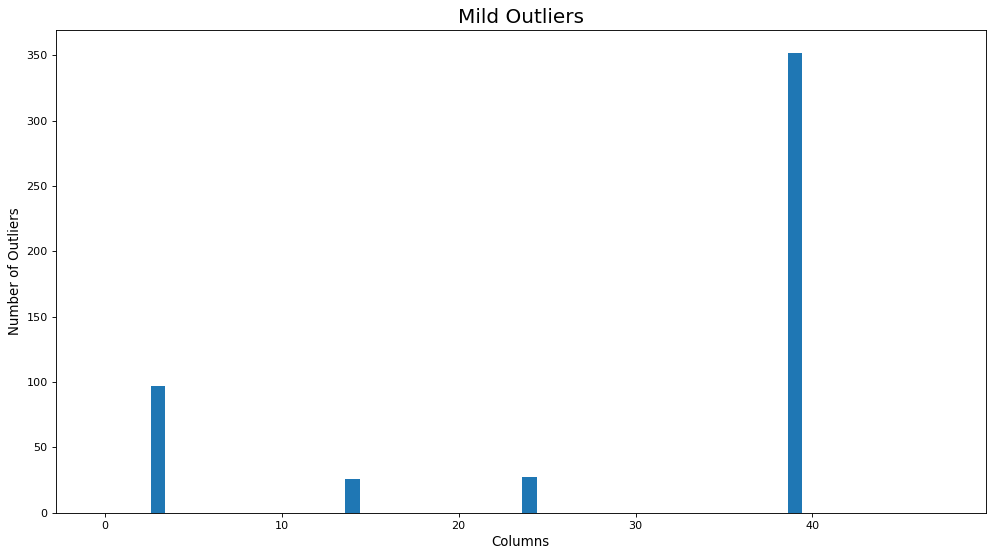

In [73]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

plt.bar(mild_outliers.keys(), mild_outliers.values())

plt.title('Mild Outliers',fontsize=18)


plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Outliers', fontsize=12)
plt.show()

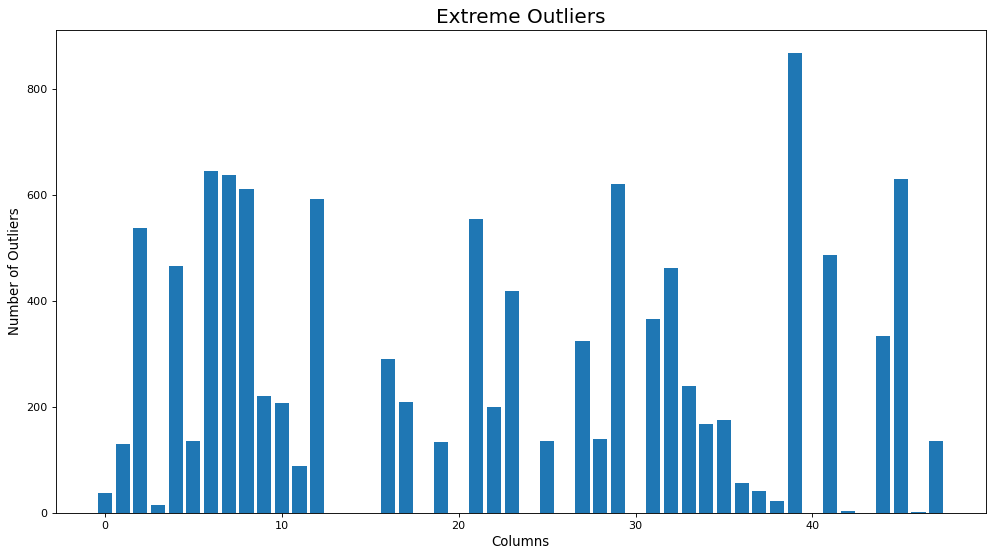

In [74]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(extreme_outliers.keys(), extreme_outliers.values())


plt.title('Extreme Outliers',fontsize=18)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Outliers', fontsize=12)
plt.show()

In [75]:
## Hold-out-method 

# defining our training data in X/Y
X= train_df
Y= train_labels.values.ravel()

# defining our validation data in X/Y
X_val = valid_df
Y_val = valid_labels.values.ravel()

In [76]:
X_com = combine_df
Y_com = combine_labels.values.ravel()

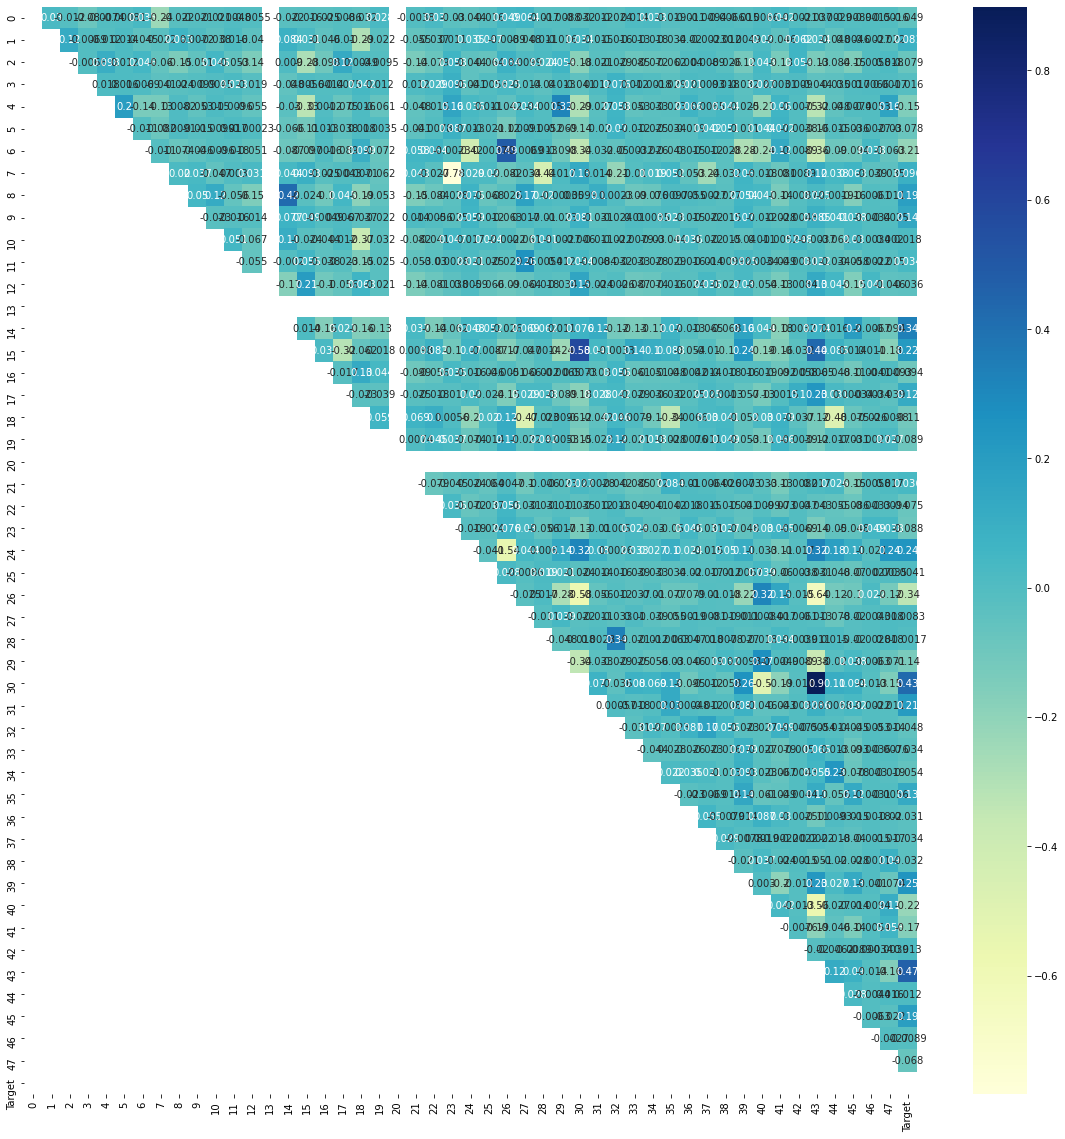

In [77]:
#get correlations of each features in training dataset
X_tr_corr = X.copy()
X_tr_corr["Target"] = Y
corrmat = X_tr_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
mask = np.tril(X_tr_corr[top_corr_features].corr())
g=sns.heatmap(X_tr_corr[top_corr_features].corr(),annot=True,cmap="YlGnBu", mask=mask)

In [78]:
def createModel(model, dataset ):
    model.fit(X, Y)

    if (dataset == "Train"):
        X_data = X
        Y_data = Y
    elif (dataset == "Valid"):
        X_data = X_val
        Y_data = Y_val

    y_pred = model.predict(X_data)
    acc_score = accuracy_score(Y_data, y_pred)
    plot_confusion_matrix(model, X_data, Y_data, display_labels=['-1', '1'], cmap=plt.cm.Blues, normalize='true' )
    #plot_precision_recall_curve(model, X_data, Y_data)

    print(f'Cross Validation Score {cross_val_score(model, X_data, Y_data, cv=5).mean()*100.0}')

    #balanced error rate (= 1- balanced acc score)
    ber = 1 - balanced_accuracy_score(Y_data, y_pred)

    #AUC
    metrics.plot_roc_curve(model, X_data, Y_data)

  
    print(f'The ber of our {dataset}-data is {ber}.')
    print(f'The accuracy score of our {dataset}-data is {acc_score}.')

### Logistic Regression

Cross Validation Score 84.78410626825757
The ber of our Train-data is 0.22380674986021165.
The accuracy score of our Train-data is 0.8529057149746805.
Cross Validation Score 83.85542168674698
The ber of our Valid-data is 0.22778192681105303.
The accuracy score of our Valid-data is 0.8481927710843373.


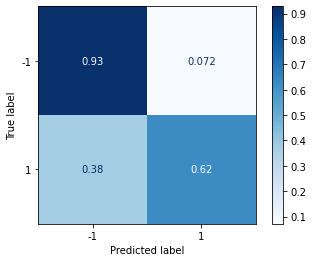

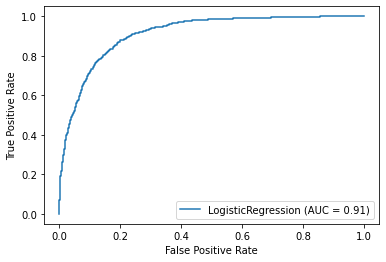

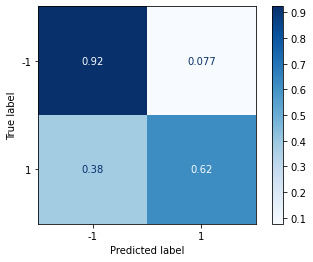

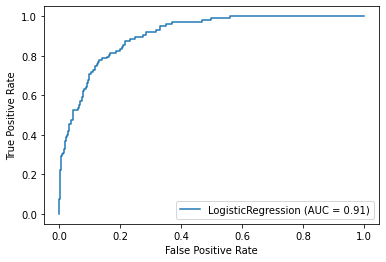

In [79]:
# Evaluate Logistic Regression on Training Dataset
createModel(LogisticRegression(max_iter=4000), "Train" )

# Evaluate Logistic Regression on Validation Dataset
createModel(LogisticRegression(max_iter=4000), "Valid" )

### Linear Discriminant Analysis

Cross Validation Score 84.4463208685163
The ber of our Train-data is 0.22358841823176623.
The accuracy score of our Train-data is 0.8473595370147095.
Cross Validation Score 83.85542168674701
The ber of our Valid-data is 0.22773525018670648.
The accuracy score of our Valid-data is 0.8433734939759037.


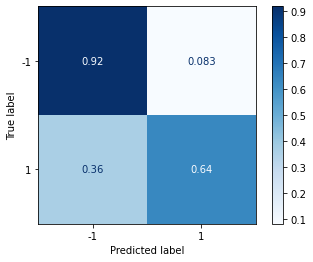

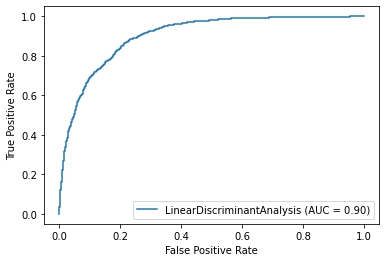

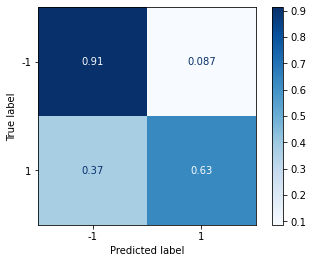

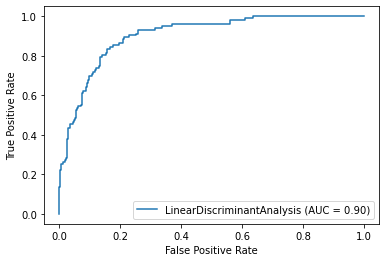

In [80]:
# Evaluate Linear Discriminant Analysis on Training Dataset
createModel(LinearDiscriminantAnalysis(), "Train" )

# Evaluate Linear Discriminant Analysis on Validation Dataset
createModel(LinearDiscriminantAnalysis(), "Valid" )

### kNN

In [81]:
knn = KNeighborsClassifier()

In [82]:
# find best Hyperparam (N-nieghbors and distance) for kNN with GridSearchCV function

def find_hyperparam_knn():
    param_grid = { 
        'n_neighbors' : np.arange(1, 20), 
        'metric': ['euclidean', 'manhattan', 'minkowski'] #distances
    }

    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) 
    grid.fit(X_tr, Y_tr)

    best_params = grid.best_params_
    print(best_params)

    return grid.best_estimator_

{'metric': 'manhattan', 'n_neighbors': 17}
Cross Validation Score 80.97492987632073
The ber of our Train-data is 0.2985053088402959.
The accuracy score of our Train-data is 0.8189052326983361.
Cross Validation Score 77.34939759036143
The ber of our Valid-data is 0.30224670151854616.
The accuracy score of our Valid-data is 0.8144578313253013.


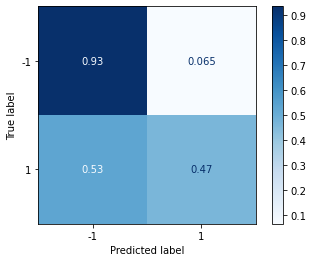

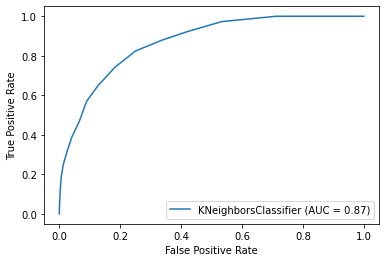

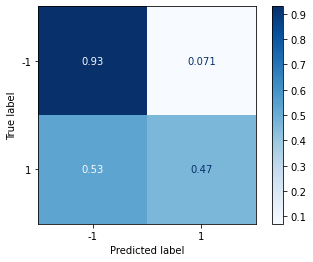

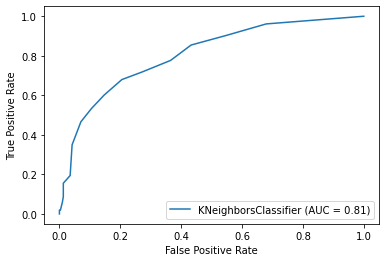

In [83]:
knn = find_hyperparam_knn()

createModel(knn, "Train" )
createModel(knn, "Valid" )

### Naïve Bayes

Cross Validation Score 77.16392227534989
The ber of our Train-data is 0.19795681490776462.
The accuracy score of our Train-data is 0.7747769471907403.
Cross Validation Score 71.08433734939759
The ber of our Valid-data is 0.20578167786905655.
The accuracy score of our Valid-data is 0.7590361445783133.


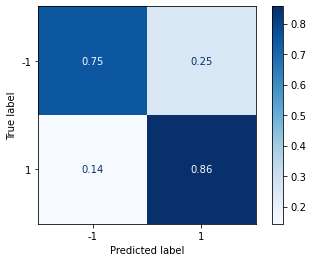

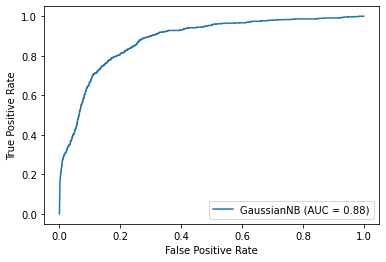

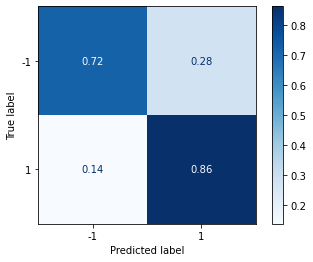

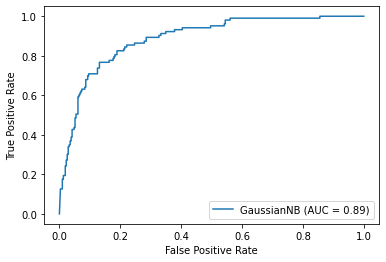

In [84]:
# Evaluate Naïve Bayes on Training Dataset
createModel(GaussianNB(), "Train" )

# Evaluate Naïve Bayes on Validation Dataset
createModel(GaussianNB(), "Valid" )

### Decicion Tree

In [85]:
decision_tree = DecisionTreeClassifier()

In [86]:
## Decision Tree + Pre-pruning
params = {'max_depth': [2,4,6],   ##maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
         'min_samples_split': [2,3,4,5,6],
         'min_samples_leaf': [1,2,3,4]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
grid_result = gcv.fit(X_tr,Y_tr)
# show best params chosen
best_params = grid_result.best_params_
print(best_params)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


Cross Validation Score 84.42257328469488
The ber of our Train-data is 0.25583713738404734.
The accuracy score of our Train-data is 0.8492886423920907.
Cross Validation Score 85.06024096385542
The ber of our Valid-data is 0.23602813044560622.
The accuracy score of our Valid-data is 0.8602409638554217.


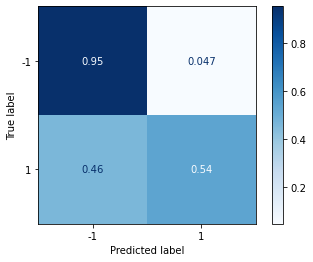

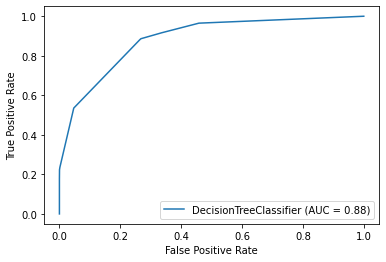

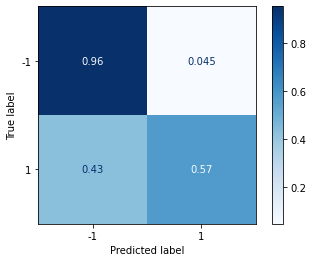

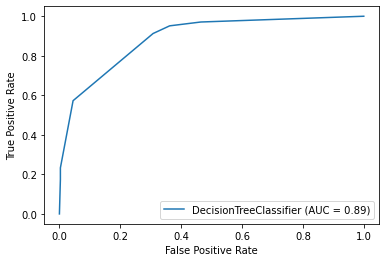

In [87]:
dtree_pre_pruned = gcv.best_estimator_
createModel(dtree_pre_pruned, "Train" )
createModel(dtree_pre_pruned, "Valid" )

### Learning Curve

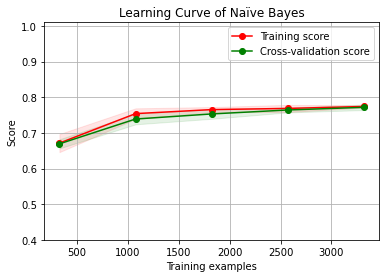

C:\Users\yemre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yemre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

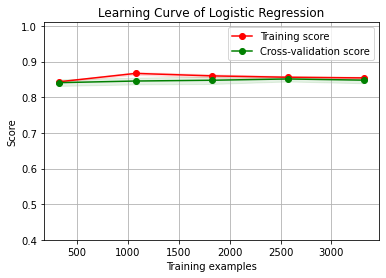

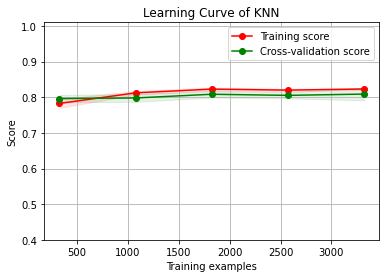

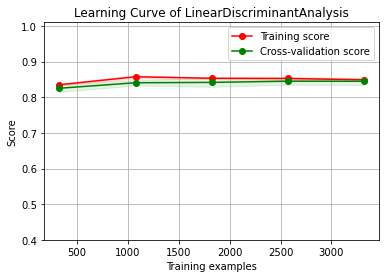

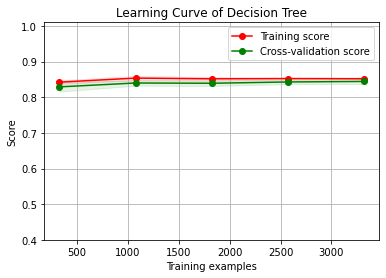

In [89]:
from sklearn.model_selection import learning_curve
def plot_curve(clf,title):

    train_sizes,train_scores,test_scores = learning_curve(clf,X,Y,random_state = 1,cv = 5)

    plt.figure()
    plt.title(title)

    ylim = (0.4, 1.01)
 
    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

plot_curve(GaussianNB(),'Learning Curve of Naïve Bayes')
plot_curve(LogisticRegression(max_iter=4000),'Learning Curve of Logistic Regression')
plot_curve(KNeighborsClassifier(n_neighbors=17, metric='manhattan'),'Learning Curve of KNN')
plot_curve(LinearDiscriminantAnalysis(),'Learning Curve of LinearDiscriminantAnalysis')
plot_curve(DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1, min_samples_split=2),'Learning Curve of Decision Tree')


### ROC Curve

In [90]:


# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=42,max_iter=2000), 
               GaussianNB(), 
               KNeighborsClassifier(metric='manhattan', n_neighbors= 17), 
               DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1, min_samples_split=2),
               LinearDiscriminantAnalysis()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X, Y)
    yproba = model.predict_proba(X_val)[::,1]
    
    fpr, tpr, _ = roc_curve(Y_val,  yproba)
    auc = roc_auc_score(Y_val, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

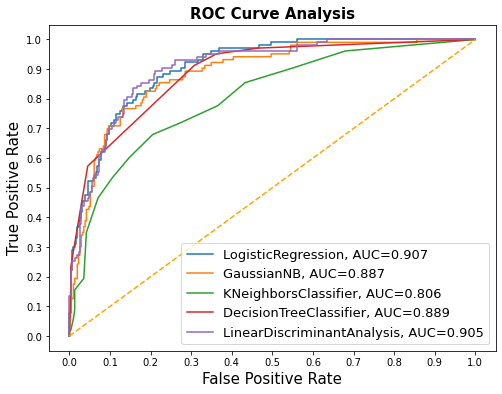

In [91]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


## K-Fold Compare Method

C:\Users\yemre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\yemre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yemre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

LR: 0.832408 (0.012679)
LDA: 0.842771 (0.012655)


C:\Users\yemre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.786348 (0.025154)


C:\Users\yemre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


DECTREE: 0.802513 (0.019006)
NB: 0.772839 (0.020608)


C:\Users\yemre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


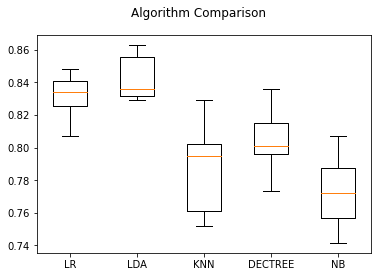

In [92]:
# Compare Algorithms

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DECTREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn

scoring = 'accuracy'
results = []
names = []
for name, model in models:

    kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle = False)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Rondom SubSampling 



In [93]:
accuracy_model_list = [ ]
auc_list = []
def Plot_ROC(name,color,ml):
    figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
    for i in range(100):
        
        X_tr, X_ts, Y_tr, Y_ts =  train_test_split(X,Y, test_size=0.2)
        sc_X = StandardScaler()
        X_tr = pd.DataFrame(sc_X.fit_transform(X_tr),columns = X_tr.columns)
        X_ts = pd.DataFrame(sc_X.fit_transform(X_ts),columns = X_ts.columns)

        model = ml
        model.fit(X_tr, Y_tr)
        accuracy_model = round(model.score(X_tr, Y_tr) * 100, 2)
        accuracy_model_list.append(accuracy_model)
        model.fit(X_tr, Y_tr)
        accuracy_model = round(model.score(X_tr, Y_tr) * 100, 2)
        accuracy_model_list.append(accuracy_model)
        lr_probs = model.predict_proba(X_ts)
        lr_probs = lr_probs[:, 1]
        lr_fpr, lr_tpr, _ = roc_curve(Y_ts, lr_probs)
        lr_auc = roc_auc_score(Y_ts, lr_probs)
        auc_list.append(lr_auc)
        plt.plot(lr_fpr, lr_tpr, marker='.',c= color )

    ns_probs = [0 for _ in range(len(Y_ts))]
    ns_fpr, ns_tpr, _ = roc_curve(Y_ts, ns_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--',c="blue")
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    # show the legend
    plt.legend()
    # show the plot
    title = "ROC-"+name+" <Rondom Subsampling(100)>"
    plt.title(title,fontsize=18)
    print("Average of "+name+" Accuracy is % : "+str(mean(accuracy_model_list)))
    print("Sandart Deviation is % :" + str(std(accuracy_model_list)))
    print("Average of AUC is : "+ str(mean(auc_list)) )
    plt.show()


No handles with labels found to put in legend.


Average of Logreg Accuracy is % : 85.36630000000001
Sandart Deviation is % :0.30035530626243306
Average of AUC is : 0.9049550083988467


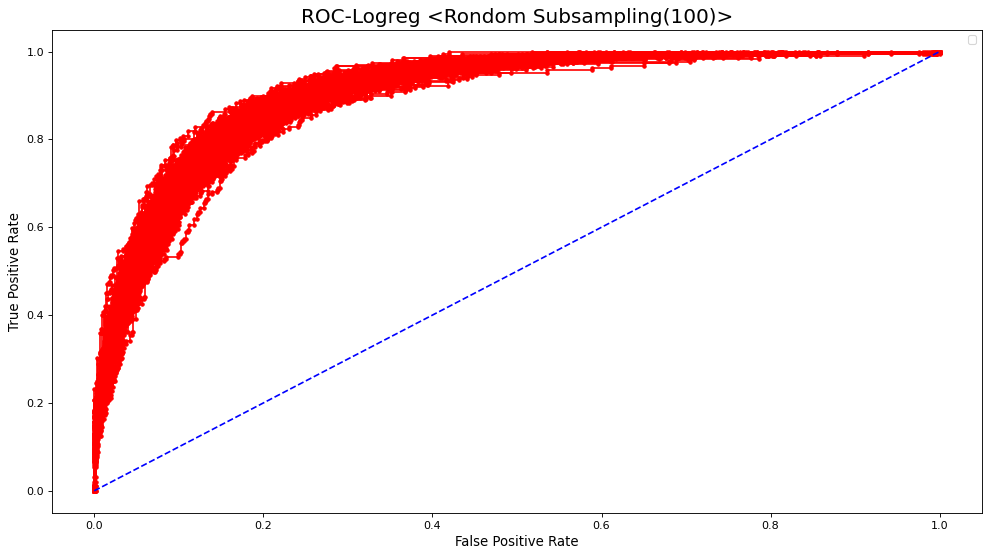

In [94]:
Plot_ROC("Logreg","red",LogisticRegression())

No handles with labels found to put in legend.


Average of Dtree Accuracy is % : 85.22104999999999
Sandart Deviation is % :0.3337789650352455
Average of AUC is : 0.8855141085362281


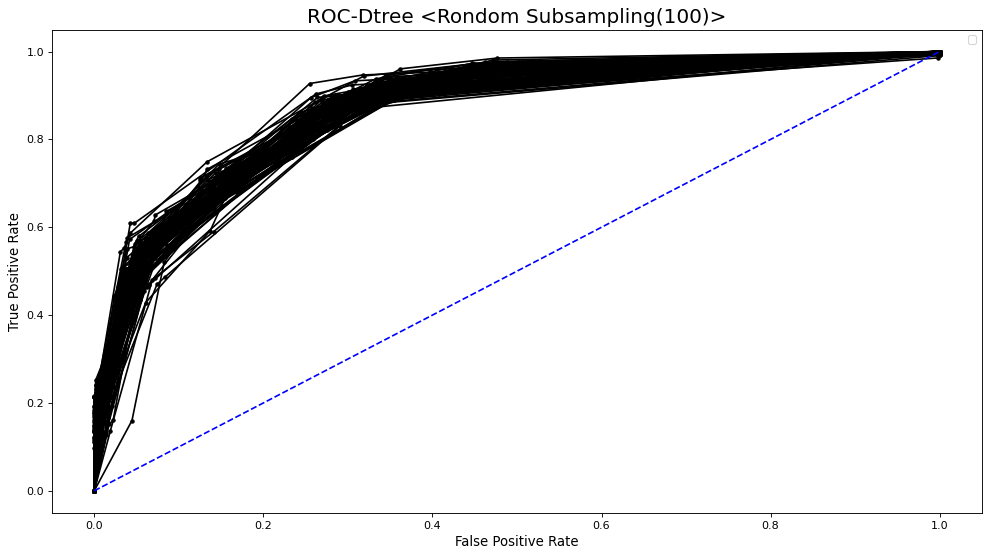

In [95]:
Plot_ROC("Dtree","black",DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1, min_samples_split=2))

No handles with labels found to put in legend.


Average of LDA Accuracy is % : 85.09916666666666
Sandart Deviation is % :0.3646683043838904
Average of AUC is : 0.8888147023117464


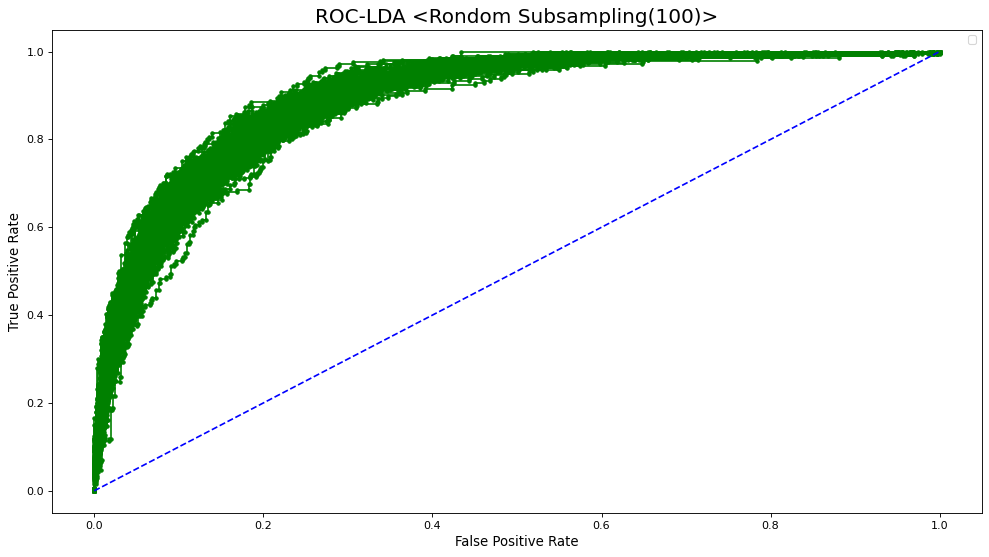

In [96]:
Plot_ROC("LDA", "green",LinearDiscriminantAnalysis() )

No handles with labels found to put in legend.


Average of KNN Accuracy is % : 84.95842499999999
Sandart Deviation is % :0.4345391459638586
Average of AUC is : 0.8836920990024788


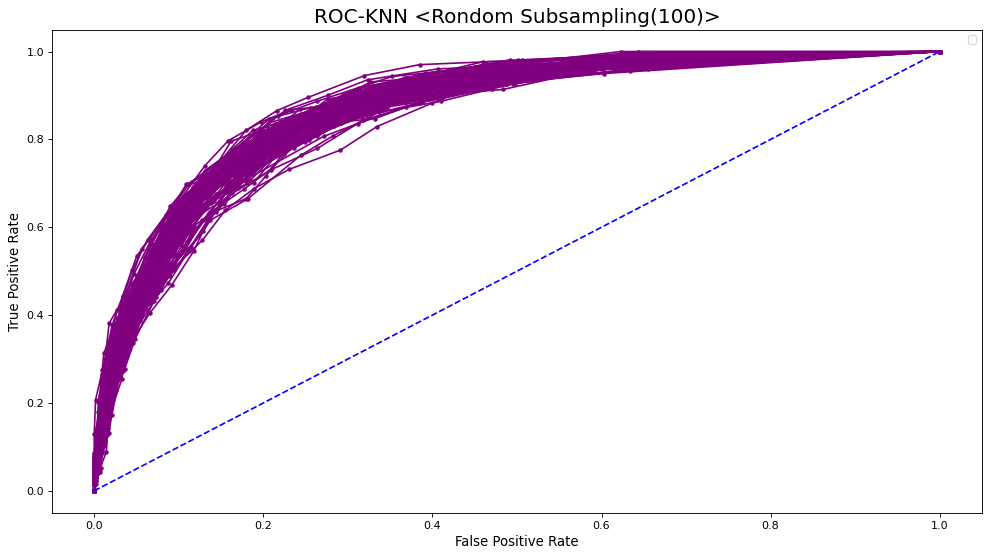

In [97]:
Plot_ROC("KNN", "purple", KNeighborsClassifier(n_neighbors=17))

No handles with labels found to put in legend.


Average of Guassian Accuracy is % : 81.48114000000001
Sandart Deviation is % :7.804125684559418
Average of AUC is : 0.8204257690452026


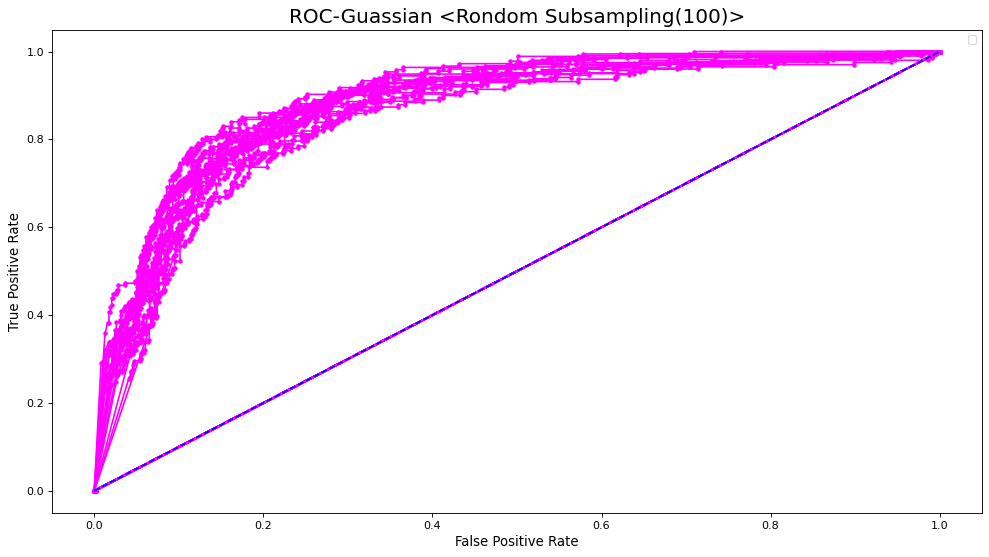

In [98]:
Plot_ROC("Guassian", "magenta",GaussianNB())